# 7. Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [6]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [7]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [11]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [12]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## 7-1. Example

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rand.multivariate_normal(mean, cov, 100)
x.shape

(100, 2)

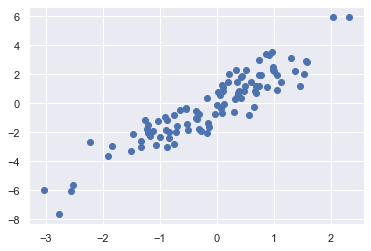

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(x[:, 0], x[:, 1]);

In [24]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([95, 83, 97, 37, 44, 76,  0, 63, 15, 33, 40, 64, 21, 86, 89, 39, 17,
       59, 43, 18])

In [25]:
selection = x[indices]
selection.shape

(20, 2)

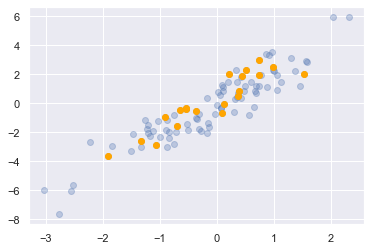

In [30]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], 
            color='orange');

## 7-2. Modifying Values with Fancy Indexing

In [31]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [32]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [33]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [35]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# 7-3. Example

In [56]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x) # 순서를 유지하면서 x의 각 요소를 bins에 추가할 때 들어갈 위치

np.add.at(counts, i, 1)

C:\Users\ksfc\Anaconda3\envs\py36_32bit\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


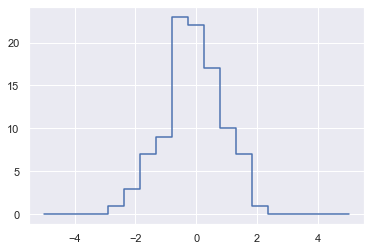

In [58]:
plt.plot(bins, counts, linestyle='steps');

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

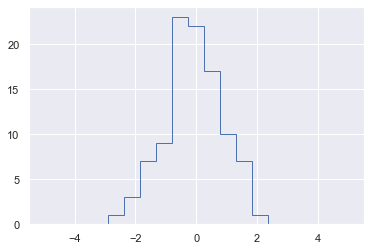

In [59]:
plt.hist(x, bins, histtype='step')